In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

In [2]:
df = pd.read_csv("haberman.csv", names=["age", "operation_year", "num_pos_detected", "survival_status"])
df.shape

(306, 4)

In [3]:
df.head()

,age,operation_year,num_pos_detected,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
T = df["age"]
E = df["survival_status"]

In [5]:
kme = KaplanMeierFitter()

In [6]:
kme.fit(
    T,
    E,
    label="Kaplan Meier Estimate"
)

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate", fitted with 306 total observations, 0 right-censored observations>

<AxesSubplot:xlabel='timeline'>

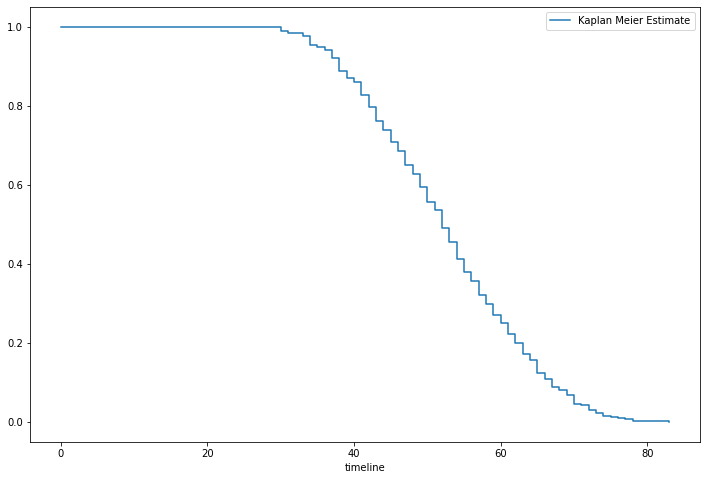

In [7]:
kme.plot(ci_show=False, figsize=(12, 8))

In [8]:
kme_2 = KaplanMeierFitter()

In [9]:
groups = df["num_pos_detected"]
i_1 = (groups >= 1)
i_2 = (groups < 1)

<AxesSubplot:xlabel='timeline'>

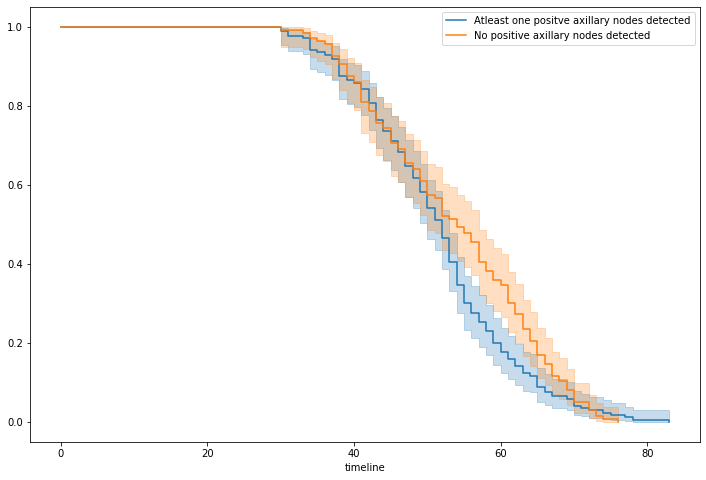

In [10]:
kme_2.fit(T[i_1], E[i_1], label="Atleast one positve axillary nodes detected")
a = kme_2.plot()

kme_2.fit(T[i_2], E[i_2], label="No positive axillary nodes detected")
kme_2.plot(ax=a, figsize=(12, 8))

There are two survival curves, one for each cohort. From the curves, it is evident that patients, who have undergone at least 1 surgery, are more likely to die sooner. Before 45 years old, the two curves are almost overlapped. At any point t>45 across the timeline, we can see that the survival probability of the cohort in blue is less than the cohort in red.